In [1]:
import numpy as np
import pandas as pd
import folium
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import datetime
import json
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=True)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.5f}'.format

In [2]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/Project2/Projcet02/1_smart_card_data'
 
df = pd.read_csv(f'{path}/smartcard_Chain.csv', encoding = 'cp949')


In [3]:
df1 = df.copy()

In [4]:
df1.shape

(8206179, 23)

# 데이터 정제

## 결측치 및 이상치 확인, 외부 데이터 병합

In [5]:
df1['route_id'].replace(np.nan, -1, inplace = True)

In [6]:
df1['Circuity'] = np.where(df1['Circuity'] == 0, np.nan, df1['Circuity'])
df1['Circuity'] = np.where(df1['Haversine'] == 0, np.nan, df1['Circuity'] )

In [7]:
# 시간대 (분단위로 변화)
df1['total_time(m)'] = (df1['total_time'] // 60)

In [8]:
df1.head(5)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(m)
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.90512,37.52269,1119074,12,42,8,충무로역,126.99362,37.56114,1102060,13,16,20,0,11000,2052,-1.00000,8897.36767,1.23632,34
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.99362,37.56114,1102060,16,2,9,중곡역,127.08428,37.56589,1105057,16,36,50,0,9400,2081,-1.00000,8008.33660,1.17378,34
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.08428,37.56589,1105057,18,22,39,선유도역,126.89329,37.53816,1119062,19,19,46,0,20100,3427,-1.00000,17116.78367,1.17429,57
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.88588,37.52039,1119076,16,11,56,문래역,126.89441,37.51906,1119076,16,15,3,0,768,187,11110803.00000,766.53989,1.00190,3
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.04729,37.51843,1123078,18,4,57,청담동래미안아파트,127.04291,37.51765,1123078,18,6,30,0,397,93,11110214.00000,395.87862,1.00283,1


In [9]:
# 시군구명칭.csv 파일 병합(외부자료)

sample = pd.read_csv(f'{path}/addtional_data/seoul_id.csv', encoding = 'cp949')

In [10]:
sample.rename(columns = { '행정구역번호' : 'on_dong'}, inplace = True)

In [11]:
df1 = df1.merge(sample, on = 'on_dong', how = 'left')

In [12]:
df1.head(5)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(m),시군구명칭,읍면동명칭
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.90512,37.52269,1119074,12,42,8,충무로역,126.99362,37.56114,1102060,13,16,20,0,11000,2052,-1.00000,8897.36767,1.23632,34,영등포구,영등포동
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.99362,37.56114,1102060,16,2,9,중곡역,127.08428,37.56589,1105057,16,36,50,0,9400,2081,-1.00000,8008.33660,1.17378,34,중구,을지로동
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.08428,37.56589,1105057,18,22,39,선유도역,126.89329,37.53816,1119062,19,19,46,0,20100,3427,-1.00000,17116.78367,1.17429,57,광진구,중곡3동
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.88588,37.52039,1119076,16,11,56,문래역,126.89441,37.51906,1119076,16,15,3,0,768,187,11110803.00000,766.53989,1.00190,3,영등포구,문래동
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.04729,37.51843,1123078,18,4,57,청담동래미안아파트,127.04291,37.51765,1123078,18,6,30,0,397,93,11110214.00000,395.87862,1.00283,1,강남구,청담동


In [13]:
df1.dropna(inplace = True)

In [14]:
df1.isnull().sum()

card_name         0
Bus               0
Subway            0
on_area_name      0
on_lon            0
on_lat            0
on_dong           0
on_hour           0
on_minute         0
on_second         0
off_area_name     0
off_lon           0
off_lat           0
off_dong          0
off_hour          0
off_minute        0
off_second        0
no_transfer       0
total_distance    0
total_time        0
route_id          0
Haversine         0
Circuity          0
total_time(m)     0
시군구명칭             0
읍면동명칭             0
dtype: int64

In [15]:
df1.head(5)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(m),시군구명칭,읍면동명칭
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.90512,37.52269,1119074,12,42,8,충무로역,126.99362,37.56114,1102060,13,16,20,0,11000,2052,-1.00000,8897.36767,1.23632,34,영등포구,영등포동
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.99362,37.56114,1102060,16,2,9,중곡역,127.08428,37.56589,1105057,16,36,50,0,9400,2081,-1.00000,8008.33660,1.17378,34,중구,을지로동
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.08428,37.56589,1105057,18,22,39,선유도역,126.89329,37.53816,1119062,19,19,46,0,20100,3427,-1.00000,17116.78367,1.17429,57,광진구,중곡3동
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.88588,37.52039,1119076,16,11,56,문래역,126.89441,37.51906,1119076,16,15,3,0,768,187,11110803.00000,766.53989,1.00190,3,영등포구,문래동
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.04729,37.51843,1123078,18,4,57,청담동래미안아파트,127.04291,37.51765,1123078,18,6,30,0,397,93,11110214.00000,395.87862,1.00283,1,강남구,청담동


In [16]:
df1['시군구명칭'].value_counts()

강남구     652864
서초구     522259
종로구     476143
중구      433746
송파구     406482
영등포구    405064
마포구     364492
동작구     347941
관악구     342266
강서구     328613
노원구     299449
성북구     296913
광진구     273405
은평구     269679
서대문구    262702
구로구     258209
동대문구    218201
강동구     209844
양천구     197954
강북구     197226
성동구     195888
용산구     186147
중랑구     174348
금천구     162368
도봉구     157529
Name: 시군구명칭, dtype: int64

## 해야할일
1. 시군구별로 데이터를 분리하기
2. Circuity가 높은 4개의 시군구를 중심으로 데이터를 분석하기.. 시군구명칭 pivot_table
3. 어떤 관계성을 데이터 분석할까?
4. 대중교통 이용승객 수와 도로교통별 혼잡 우회계수와 상관관계가 있을까??

In [59]:
df2 = df1[df1['Circuity'] < 3]

In [60]:
print(df2.shape)
df2.head(5)

(7563077, 26)


,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(m),시군구명칭,읍면동명칭
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.90512,37.52269,1119074,12,42,8,충무로역,126.99362,37.56114,1102060,13,16,20,0,11000,2052,-1.00000,8897.36767,1.23632,34,영등포구,영등포동
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.99362,37.56114,1102060,16,2,9,중곡역,127.08428,37.56589,1105057,16,36,50,0,9400,2081,-1.00000,8008.33660,1.17378,34,중구,을지로동
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.08428,37.56589,1105057,18,22,39,선유도역,126.89329,37.53816,1119062,19,19,46,0,20100,3427,-1.00000,17116.78367,1.17429,57,광진구,중곡3동
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.88588,37.52039,1119076,16,11,56,문래역,126.89441,37.51906,1119076,16,15,3,0,768,187,11110803.00000,766.53989,1.00190,3,영등포구,문래동
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.04729,37.51843,1123078,18,4,57,청담동래미안아파트,127.04291,37.51765,1123078,18,6,30,0,397,93,11110214.00000,395.87862,1.00283,1,강남구,청담동


In [19]:
#plt.figure(figsize = (20, 10))
#sns.barplot(data = df1, x = '시군구명칭', y = 'Circuity')
#plt.xticks(rotation = 45)
#plt.show()

In [20]:
df2.shape

(7622686, 26)

In [21]:
df1.shape

(7639732, 26)

In [22]:
## folium을 활용한 데이터 파악 

In [23]:
import folium
import json

geo_path = f'{path}/addtional_data/municipalities-geo-simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

center = [37.541, 126.986]
m1 = folium.Map(location=center, zoom_start=10.5)

folium.Choropleth(
        geo_data=geo_str,
        data=df1,
        columns=('시군구명칭', 'Circuity'),
        key_on='feature.properties.name',
        fill_color='BuPu',
        legend_name='우회계수 빈도').add_to(m1)
m1

In [24]:
import folium
import json

geo_path = f'{path}/addtional_data/municipalities-geo-simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

center = [37.541, 126.986]
m1 = folium.Map(location=center, zoom_start=10.5)

folium.Choropleth(
        geo_data=geo_str,
        data=df2,
        bins = 8,
        columns=('시군구명칭', 'Circuity'),
        key_on='feature.properties.name',
        fill_color='BuPu',
        legend_name='탑승빈도').add_to(m1)
m1

In [25]:
df2.pivot_table(index = '시군구명칭', values = 'Circuity', aggfunc = 'mean')

,Circuity
시군구명칭,
강남구,1.27263
강동구,1.26359
강북구,1.36681
강서구,1.35144
관악구,1.39093
광진구,1.25786
구로구,1.33845
금천구,1.32466
노원구,1.29294


In [26]:
# FOLIUM 시각화 확인시, 마포구, 중랑구, 서대문구, 서초구 네개의 구에서 Circuity 빈도가 높은 것으로 확인
# 즉, 4개의 구가 타 구에 비해 혼잡하다고 추정함.
# 4개의 구를 각각 비교하여 혼잡정도를 비교하여, 온디맨드 서비스 최적위치를 확인함

In [27]:
#plt.figure(figsize = (20, 14))
#df1.boxplot(column = 'Circuity', by = '시군구명칭')
#plt.xticks(rotation = 45)
#plt.show()

In [28]:
df_seocho = df2[df2['시군구명칭'] == '서초구']

df_seocho = df_seocho[(df_seocho['Circuity'] < 3) & (df_seocho['total_time(m)'] < 90)].sort_values(by = 'Circuity', ascending = False)

df_seocho.head(10)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(m),시군구명칭,읍면동명칭
1544499,A2/EvXmxjLQcKvMH7fezOc5BBp5VerCXorE8D2xro0Y=,True,False,남부터미널,127.01550,37.48474,1122053,19,55,52,예술의전당,127.01405,37.48113,1122053,20,12,20,2,1262,578,11110652.00000,420.85939,2.99863,9,서초구,서초3동
1092930,6WL3yPrHW1GJ4l66vRu41/P+yF7y0h9tTK6WoYrv6O8=,True,False,남부터미널,127.01550,37.48474,1122053,19,55,50,예술의전당,127.01405,37.48113,1122053,20,12,25,2,1262,581,11110652.00000,420.85939,2.99863,9,서초구,서초3동
7344742,tF23piaBMy7/v2mHRAED9ffKV3ppZFpCSQz/shUNLig=,True,False,우면주공아파트.우면한라아파트,127.02570,37.47075,1122066,23,25,57,인덕원역4호선,126.97562,37.40312,3104256,0,35,22,1,26151,3863,11110802.00000,8723.70957,2.99769,64,서초구,양재1동
5264315,d0Ot1Pw9VaBXrjmgTzNROsV73M28RFYyKVXnPbMuvW4=,True,False,LH3.4단지,127.02274,37.45798,1122066,6,45,33,언남중고교,127.04570,37.47204,1122067,7,18,43,1,7669,1571,11110806.00000,2559.68358,2.99607,26,서초구,양재1동
3201962,MxEPeoQT1XAri/obKoF2nbAxdoG+0wSHGfifjF/fSJs=,True,False,서초3동주민센터,127.01203,37.48325,1122053,17,5,8,서초역,127.00891,37.49202,1122053,17,52,50,2,3034,664,41110040.00000,1012.82770,2.99557,11,서초구,서초3동
3634505,QJq69g3H63VWwx90WfQNNFL+monFOZ8pModTUnA8wp4=,True,False,사당역12번출구,126.98195,37.47789,1122063,18,31,39,내방역2번출구,126.99436,37.48688,1122062,18,54,42,1,4440,1114,11110659.00000,1482.99362,2.99394,18,서초구,방배2동
7826459,x/rUZQ6HUHKwQz4vYwWMD2kARMy4FAwuQnl/BX2kR6w=,True,False,구반포역,126.99006,37.50199,1122056,19,10,55,갯마을앞,126.98333,37.49746,1122061,19,41,0,1,2331,1620,41110219.00000,778.72957,2.99334,27,서초구,반포본동
790139,48aSztLWXQ5NKt4CSI5qDtTkQDMCSty+TURUqP3FuBo=,True,False,신중초등학교,127.01070,37.47970,1122053,13,53,50,서초중학교,127.00877,37.48346,1122053,13,59,46,0,1352,356,11110746.00000,451.89908,2.99182,5,서초구,서초3동
1307114,8BMjNlVdKlSceH1QfV+b+QmCG+6Q49eDpsL0c3yRJu4=,True,False,신중초등학교,127.01070,37.47970,1122053,11,56,17,서초중학교,127.00877,37.48346,1122053,12,2,7,0,1352,350,11110746.00000,451.89908,2.99182,5,서초구,서초3동
5261555,d/1iCyEpLgm5VwKBTdYLiw==,True,False,신중초등학교,127.01070,37.47970,1122053,9,13,21,서초중학교,127.00877,37.48346,1122053,9,18,45,2,1352,324,11110746.00000,451.89908,2.99182,5,서초구,서초3동


In [29]:
#plt.pie(df2, labels=df2['Circuity'], autopct = "%.1f%%")

df_count = df2.groupby (["시군구명칭", "Circuity"]).size()

In [30]:
#df_count.plot.pie(y = "시군구명칭", autopct ="%.1f%%")

In [31]:
## 버스랑 지하철 같이타는 사람 비율, 버스만 타는 사람 비율, 지하철만 타는 사람 비율, 둘다 안타는 사람 비율 
## 환승횟수에 따른 비율도 고려를 해보고..

In [32]:
## 나누는 기준을 버스, 지하철을 탄사람으로 기준....

In [33]:
only_sub = (df2['Subway'] == True) & (df2['Bus'] == False)
only_bus = (df2['Subway'] == False) & (df2['Bus'] == True)
both = (df2['Subway'] == True) & (df2['Bus'] == True)

In [34]:
df_both = df2[both]
df_sub = df2[only_sub]
df_bus = df2[only_bus]

In [35]:
avg_transfer = { 'Bus' : df_bus['Circuity'].mean(),
                'Subway' : df_sub['Circuity'].mean(),
                'Both' : df_both['Circuity'].mean()
               }

avg_transfer

{'Bus': 1.3884999792910808,
 'Subway': 1.2208807005522673,
 'Both': 1.3904783929402755}

In [36]:
df_mean = pd.DataFrame(columns = ['name', 'mean'] , data = avg_transfer.items())

In [37]:
df_mean = df_mean.pivot_table(index = 'name', values = 'mean')

<AxesSubplot:xlabel='name'>

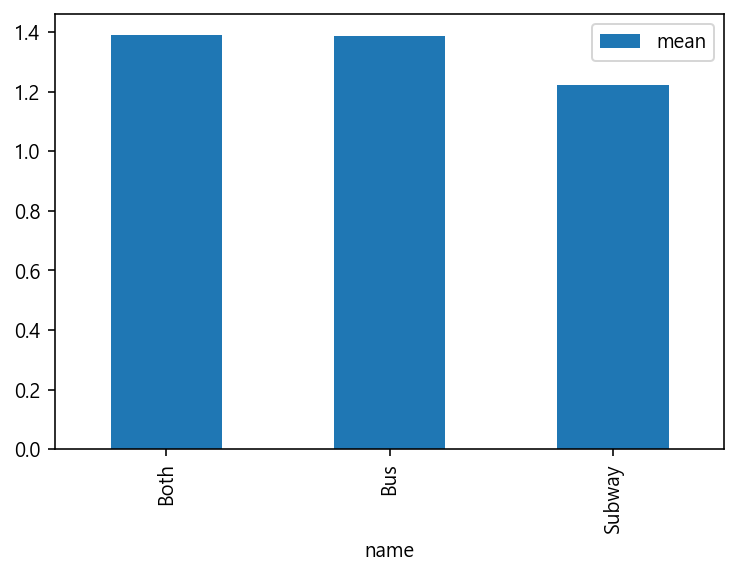

In [38]:
df_mean.plot(kind = 'bar' )

In [39]:
dff = pd.read_csv('C:/Users/user/Desktop/TodayLearn/TiL/Code/Project2/Projcet02/1_smart_card_data/data/smartcard20171019_before_Chained.csv', encoding = 'cp949')

In [40]:
dff.shape

(10338082, 19)

In [41]:
dff[dff['no_transfer'] == 2]

,card_name,route_id,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_duration
27,///gx6hPZviMrzjaDxI+/ohhVKC/xCBF9Dnf795s4BA=,버스,강서구청,126.85057,37.55264,1116061,6,56,36,경복비즈니스고등학교,126.85348,37.55765,1116052,6,59,47,2,611,191
69,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,버스,연세로.문학의거리,126.93700,37.55626,1113075,14,38,28,연세로.명물거리,126.93698,37.55815,1113075,14,40,8,2,210,100
93,//0CRnnl2BlW7G6hoK2ndN7EkeGSqieSk83V6kjZjmM=,버스,서대문세무서별관,126.92630,37.60142,1112059,15,17,19,신진자동차고등학교.이마트.은평점,126.91918,37.59993,1112059,15,21,3,2,650,224
143,//1Iww0x3zr6LaDqSmfY+uKp5IKc5w/nQbqUBS746WE=,버스,수유역,127.02532,37.63755,1109060,19,26,23,삼성하이츠빌라,127.01101,37.63681,1109075,19,40,26,2,2282,843
152,//1ThBjX0NqcraOscsU8A8gu42Wv0mi1d7aIIjBt02U=,버스,신림사거리,126.92969,37.48266,1121064,20,26,52,대학동고시촌입구,126.93827,37.47052,1121073,20,34,29,2,2199,457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10337998,ZzZuF+FrgUJ83AbN9+G+p5qnGPBvXhWgQo/ha3jdDfs=,버스,발산역,126.83863,37.55929,1116054,6,31,10,호서전문학교,126.83978,37.56292,1116054,6,33,15,2,416,125
10338011,zzzUwvk+Uz6Q6Ocma6N5et/B2LGXro5Aen+xDdNcH94=,버스,문정로데오거리입구,127.12077,37.48901,1124069,19,46,38,위례신도시24단지앞,127.14113,37.47573,1124070,20,0,23,2,2995,825
10338013,ZzZv4l+sCaVMZNPZXxqXLH+d5Y/yOf6to2DaSWsQlTg=,버스,신촌전철역,126.93715,37.55539,1113075,8,10,33,연세로.명물거리,126.93698,37.55815,1113075,8,11,55,2,332,82
10338032,zZzWfE3CYzJN9jIg8cf7a9jgbI7JbyCLK/qCWeu8E44=,버스,남영역,126.97193,37.54205,1103053,9,41,54,원효로2가,126.96300,37.53628,1103072,9,44,7,2,1029,133


In [42]:
dff[dff['card_name']=='//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=']

,card_name,route_id,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_duration
67,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,버스,또또와마트,127.02882,37.55279,1104059,13,58,7,행당역.대림아파트정문,127.02870,37.55705,1104057,14,1,53,0,882,226
68,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,지하철,행당역,127.02933,37.55724,1104052,14,4,19,신촌역,126.93698,37.55515,1113075,14,34,38,1,9200,1819
69,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,버스,연세로.문학의거리,126.93700,37.55626,1113075,14,38,28,연세로.명물거리,126.93698,37.55815,1113075,14,40,8,2,210,100
70,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,지하철,신촌역,126.93698,37.55515,1113075,21,9,10,신당역,127.01947,37.56566,1102069,21,29,39,0,7500,1229
71,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,버스,신당역하나은행,127.02159,37.56542,1102065,21,31,56,논골신협.대림아파트후문,127.02450,37.55754,1104059,21,39,1,1,1069,425


In [43]:
df1[df1['card_name'] == '//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=']

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(m),시군구명칭,읍면동명칭
129881,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,True,True,또또와마트,127.02882,37.55279,1104059,13,58,7,연세로.명물거리,126.93698,37.55815,1113075,14,40,8,2,10292,2145,11110672.00000,8118.39686,1.26774,35,성동구,금호1가동
129882,//+rpolD6iGuQkXqcDxr72w/AmrLruRlGyBaMg1j4qw=,True,True,신촌역,126.93698,37.55515,1113075,21,9,10,논골신협.대림아파트후문,127.02450,37.55754,1104059,21,39,1,1,8569,1654,11110671.00000,7719.92920,1.10998,27,서대문구,신촌동


In [44]:
## 지하철의 평균 우회계수는 1.228 

# 구간을 정해놓고 분석을 하자.. 
# 거리와 

In [50]:
df_Ex = df1[(df1['Circuity'] < 0.8)]

df_Ex

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(m),시군구명칭,읍면동명칭
3670,+/nKu2GGrnuzulYQiUluwD4wvQP4+zq/AeyW8WynzNQ=,True,False,종로2가,126.98636,37.57040,1101061,15,2,26,종점약국,126.98778,37.54327,1103052,15,26,12,1,2154,1208,11110014.00000,3019.19260,0.71344,20,종로구,종로1·2·3·4가동
4422,+08a5sZqlbY1RMBTMKeEZEURAZn1x8pj4Y5z8tf9tVs=,True,False,청담초등학교,127.04512,37.52685,1123078,18,20,23,북아현삼거리,126.95264,37.56507,1113073,18,57,58,1,901,336,11110014.00000,9194.24437,0.09800,5,강남구,청담동
4724,+0HpGMq/S2K23pXX9Aeimb8axZIqWAJuQPL718oxG+w=,True,False,창문여고앞,127.03601,37.61223,1108071,9,34,31,정릉길음시장.길음뉴타운9단지,127.01941,37.60258,1108062,9,52,7,1,1379,507,11110028.00000,1813.55562,0.76038,8,성북구,월곡1동
5700,+0mUtMuQy5t8G5wjcI2iJAMoPGzJvT5h0Og7kjAxz8Y=,True,False,이문동우체국,127.06174,37.59944,1106089,9,54,36,마리오아울렛,126.88404,37.47875,1118051,11,1,7,1,2882,796,11110167.00000,20629.33153,0.13970,13,동대문구,이문1동
6445,+1Aw8quLfFkyG8jgj+PPYoFeatPVCR0LYytn4eNXbhM=,True,False,삼선교.한성대학교,127.00823,37.58933,1108082,16,35,4,숭덕초교,127.01466,37.60339,1108062,16,54,2,1,1229,507,11110024.00000,1662.97872,0.73904,8,성북구,삼선동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8200755,zxKcFeYbOfukMqrAkNFWhMtKn+45FQWQJF0ys/0pZxg=,True,False,마포구청역,126.90224,37.56229,1114070,4,32,0,연희104고지앞.구성산회관,126.92579,37.56640,1113076,4,47,38,1,1037,313,11110056.00000,2125.99771,0.48777,5,마포구,망원2동
8201531,zxiSUBeI1BzSvPUu1r1p4OUdbqla+f2XMJm3LI7HvRw=,True,False,월곡동두산아파트,127.03662,37.60653,1108071,11,28,40,고대앞,127.03488,37.58863,1108060,11,41,6,1,1501,353,11110115.00000,1995.93366,0.75203,5,성북구,월곡1동
8202697,zyIqaPIPmqmRWvp/dlEPt7NEV4Nlz18RkX+aQFYaKCo=,True,False,명지전문대.충암중고등학교,126.92396,37.58467,1113068,16,17,59,신진자동차고등학교,126.92066,37.59791,1112059,16,27,30,1,1143,309,41110072.00000,1500.89557,0.76155,5,서대문구,홍은2동
8203100,zyW6FZuOIBDj+N7F05H1Lg2g4Qx1bvE3HL/55znTq44=,True,False,동대문구청.용신동주민센터,127.03799,37.57531,1106081,17,41,56,행당신동아.행당푸르지오아파트,127.03402,37.55618,1104057,17,54,3,1,1564,375,11110009.00000,2155.34902,0.72564,6,동대문구,용신동


In [46]:
#sns.scatterplot(data = df_Ex, x = 'total_distance', y = 'Circuity', hue = 'no_transfer')

In [47]:
#sns.scatterplot(data = df_Ex, x = 'total_distance', y = 'Circuity', hue = 'no_transfer')

<AxesSubplot:xlabel='total_distance', ylabel='Circuity'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


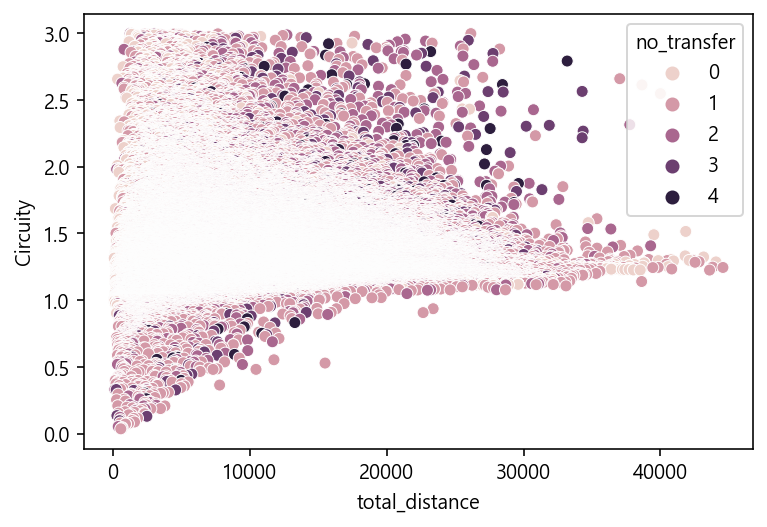

In [48]:
sns.scatterplot(data = df_seocho, x = 'total_distance', y = 'Circuity', hue = 'no_transfer')

In [51]:
dff[dff['card_name']=='+08a5sZqlbY1RMBTMKeEZEURAZn1x8pj4Y5z8tf9tVs=']

,card_name,route_id,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_duration
167956,+08a5sZqlbY1RMBTMKeEZEURAZn1x8pj4Y5z8tf9tVs=,버스,북아현삼거리,126.95264,37.56507,1113073,6,40,15,한성고교,126.95666,37.55960,1113074,6,44,58,0,733,283
167957,+08a5sZqlbY1RMBTMKeEZEURAZn1x8pj4Y5z8tf9tVs=,버스,청담초등학교,127.04512,37.52685,1123078,18,20,23,청담초등학교,127.04512,37.52685,1123078,18,20,59,0,0,36
167958,+08a5sZqlbY1RMBTMKeEZEURAZn1x8pj4Y5z8tf9tVs=,버스,능안로입구,126.95644,37.55822,1113074,18,52,58,북아현삼거리,126.95264,37.56507,1113073,18,57,58,1,901,300


In [68]:
## Circuity가 1아래인 애들은 분석할 필요가 없다? why? 대중교통 취약지점 분석을 위한 데이터이기 떄문
##정당한 이유가 있으면 삭제 가능.. 결측치!!!!
df2 = df2[df2['Circuity'] >= 1.0]

In [69]:
df2.shape

(7308019, 26)